# AOD

## langley calibration

### load calibration

In [2]:
import helpers

In [3]:
import atmPy.radiation.retrievals.langley_calibration as atmlc

<xarray.Dataset> Size: 168B
Dimensions:     (wavelength: 6)
Coordinates:
  * wavelength  (wavelength) int32 24B 415 500 670 870 940 1625
Data variables:
    V0          (wavelength) float64 48B 7.886 7.241 6.655 7.509 7.718 6.219
    V0_std      (wavelength) float64 48B 0.0 0.0 0.0 0.0 0.0 0.0
    V0_stderr   (wavelength) float64 48B 0.001221 0.001247 ... 0.001458 0.001511

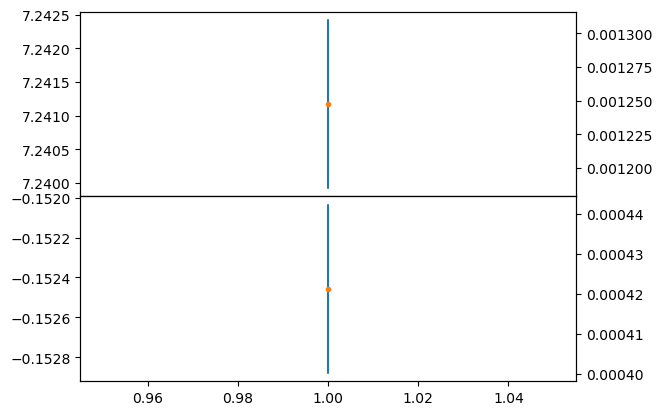

In [4]:
p2fld = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.2/')
lt = atmlc.open_langleys(p2fld)
lt648 = lt
lt.plot_ranked(wl = 500)
lt.V0_simple

<xarray.Dataset> Size: 168B
Dimensions:     (wavelength: 6)
Coordinates:
  * wavelength  (wavelength) int32 24B 415 500 670 870 940 1625
Data variables:
    V0          (wavelength) float64 48B 7.988 7.233 6.776 7.615 7.787 6.255
    V0_std      (wavelength) float64 48B 0.003772 0.0007407 ... 0.05823 0.006433
    V0_stderr   (wavelength) float64 48B 0.001153 0.001047 ... 0.001746 0.001725

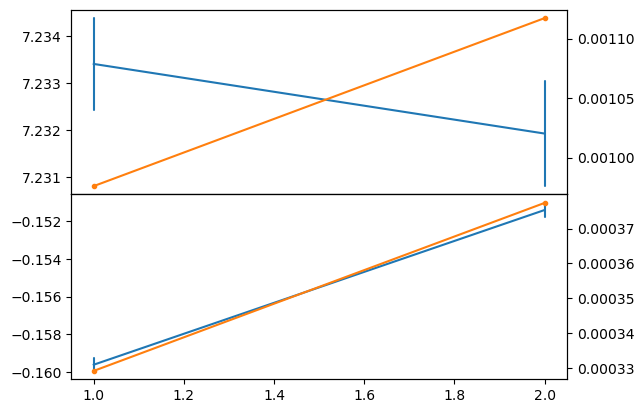

In [5]:
p2fld = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.2/')
lt = atmlc.open_langleys(p2fld)
lt649 = lt
lt.plot_ranked(wl = 500)
lt.V0_simple

### Load a file

## calibrate to irradiance

In [6]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspec

In [7]:
reload(atmspec)

<module 'atmPy.radiation.retrievals.spectral_irradiance' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py'>

sh: 1: getfattr: not found
sh: 1: getfattr: not found
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
sh: 1: getfattr: not found
sh: 1: getfattr: not found
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog

precipitable water variable has no unit attribute. Assuming it is in cm.


sh: 1: getfattr: not found


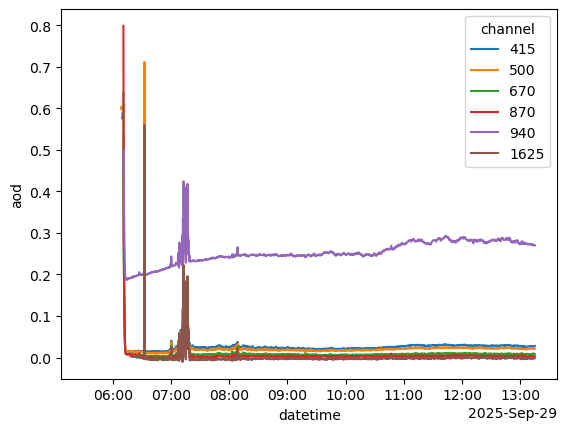

In [8]:
serial_no = 648
fn = '/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250929.nc'
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250929_preliminary.nc'
ds = xr.open_dataset(fn)
dsmet = xr.open_dataset(fnmet)
gdd = atmspec.CombinedGlobalDiffuseDirect(ds.copy())
gdd.dataset['channel_wavelength'] = gdd.dataset.channel_wavelength.astype(float) #error in processing upstream, fix it in future versions!
gdd = gdd.apply_calibration_langley(lt648)

dni = gdd.direct_normal_irradiation
# dni.raw_data = dni.raw_data.where(dni.raw_data.channel < 1000, drop = True)
dni.met_data = dsmet
# dni.precipitable_water_varname = 'precipitable_water_aeronet'
dni.precipitable_water = 1

dni.met_data = fnmet
dni.ozone_data = 300
dni.raw_data.attrs['serial_no'] = serial_no
# dni.mfrsr_history = None
dni.aod.plot.line(x = 'datetime')
dni648 = dni

# precipitable water

In [56]:
p2pwd_lut = '/home/hagen/projecte/mfrsr2pwv/data/pwd_od_lut_648.nc'
ds_pwdlut = xr.open_dataset(p2pwd_lut)

sh: 1: getfattr: not found


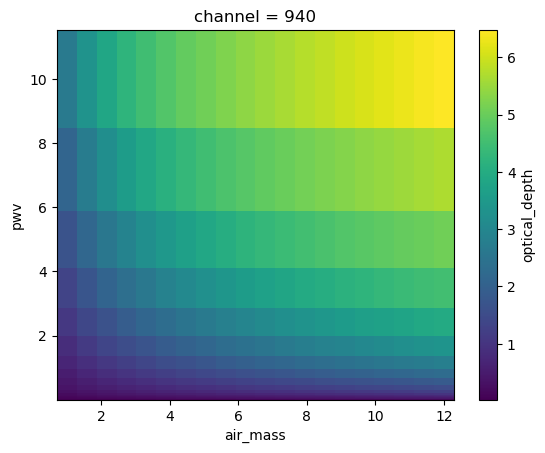

In [115]:
ds_pwdlut.optical_depth.plot()

In [57]:
ds_pwdlut

<xarray.Dataset> Size: 4kB
Dimensions:             (pwv: 20, air_mass: 20)
Coordinates:
  * pwv                 (pwv) float64 160B 0.01 0.01438 0.02069 ... 6.952 10.0
  * air_mass            (air_mass) float64 160B 1.0 1.579 2.158 ... 11.42 12.0
    channel             int64 8B ...
    solar_zenith_angle  (air_mass) float64 160B ...
Data variables:
    optical_depth       (pwv, air_mass) float64 3kB ...

In [16]:
wod = dni.aod.sel(channel = 940)

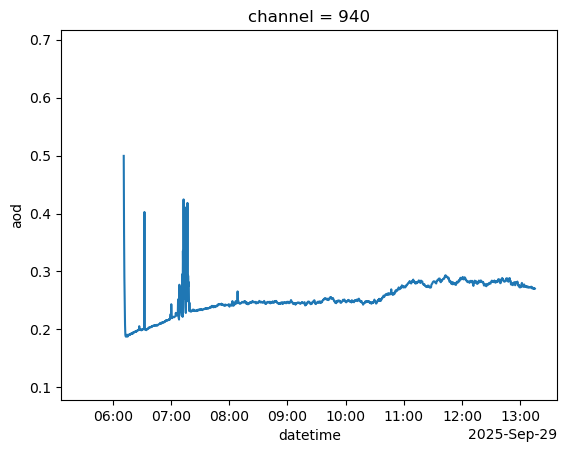

In [18]:
wod.plot()

In [39]:
dni.sun_position

,elevation,azimuth,airmass,sun_earth_distance,ampm
datetime,,,,,
2025-09-29 00:00:00.000000000,-0.774278,0.300848,-1.430206,1.001844,b'am'
2025-09-29 00:00:19.871999809,-0.773986,0.302826,-1.430634,1.001844,b'am'
2025-09-29 00:00:39.744000250,-0.773691,0.304802,-1.431065,1.001843,b'am'
2025-09-29 00:00:59.616000069,-0.773395,0.306778,-1.431499,1.001843,b'am'
2025-09-29 00:01:20.352000172,-0.773084,0.308838,-1.431956,1.001843,b'am'
...,...,...,...,...,...
2025-09-29 15:33:40.031999887,0.250770,4.363178,4.029817,1.001655,b'pm'
2025-09-29 15:33:59.903999706,0.249843,4.364317,4.044455,1.001655,b'pm'
2025-09-29 15:34:19.776000146,0.248916,4.365455,4.059208,1.001655,b'pm'


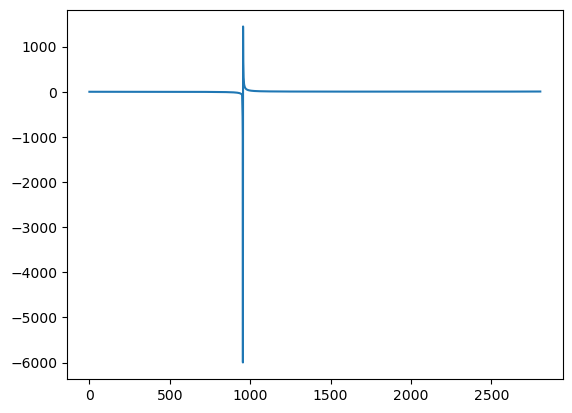

In [46]:
plt.plot(dni.sun_position.airmass.values)

In [98]:
row = dni.sun_position.iloc[2000]
row

elevation             0.708488
azimuth               3.117409
airmass               1.536839
sun_earth_distance    1.001709
ampm                     b'am'
Name: 2025-09-29 11:06:39.743999749, dtype: object

In [ ]:
aod870 = dni.aod.sel(channel = 870, datetime = row.name)
wl870 = dni.raw_data.channel_wavelength.sel(channel = 870)#, datetime = row.name)

In [126]:
aod670 = dni.aod.sel(channel = 670, datetime = row.name)
wl670 = dni.raw_data.channel_wavelength.sel(channel = 670)#, datetime = row.name)

<xarray.Dataset> Size: 2MB
Dimensions:                    (datetime: 2806, channel: 6, wavelength: 596)
Coordinates:
  * datetime                   (datetime) datetime64[ns] 22kB 2025-09-29 ... ...
  * channel                    (channel) int64 48B 415 500 670 870 940 1625
  * wavelength                 (wavelength) int64 5kB 380 381 382 ... 974 975
Data variables: (12/20)
    alltime                    (datetime, channel) int64 135kB ...
    global_horizontal          (datetime, channel) float64 135kB nan ... 0.06159
    diffuse_horizontal         (datetime, channel) float64 135kB nan ... 0.00...
    channel_wavelength         (channel) float64 48B 413.6 497.1 ... 1.624e+03
    direct_horizontal          (datetime, channel) float64 135kB ...
    cosine_calibraion_direct   (datetime, channel) float64 135kB ...
    ...                         ...
    transmission               (datetime, channel) float64 135kB nan ... 0.9755
    od_rayleigh                (channel, datetime) float64 135kB 0.26 ... nan
    ozone_absorption_spectrum  (wavelength) float64 5kB 0.0 0.0 0.0 ... 0.0 0.0
    ozon_absoption_by_channel  (channel) float64 48B 0.0003 0.02579 ... 0.0
    od_ozone                   (channel, datetime) float64 135kB 9e-05 ... 0.0
    aod                        (datetime, channel) float64 135kB nan nan ... nan
Attributes: (12/18)
    site_longitude:         -350.161743
    site_latitude:          46.807251
    site_elevation:         0
    site:                   TMP
    site_name:              unknown
    calibrated_irradiance:  False
    ...                     ...
    day_complete:           False
    parent_files:           /nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648/64...
    product_version:        0.1
    calibrated_spectral:    True
    clalibration_cosine:    True
    calibrated_langley:     True

In [116]:
def row2pwv(row):
    if ds_pwdlut.air_mass.min() <= row.airmass <= ds_pwdlut.air_mass.max():
        # print('buba')
        aodt = dni.aod.sel(channel = 940, datetime = row.name)
        # the lut is in optical depth along the path, so not normalize to air mass
        aodt *= row.airmass
        lut_at_am = ds_pwdlut.interp(air_mass = row.airmass, method='linear')
        lut_at_am_inv = xr.DataArray(lut_at_am.pwv.values, coords = {'od': lut_at_am.optical_depth.values})
        pwv = float(lut_at_am_inv.interp(od = aodt).values)
    else:
        pwv = np.nan
    return pwv

In [117]:
out = dni.sun_position.apply(row2pwv, axis = 1)
out

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/core/missing.py:588: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/core/missing.py:588: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/core/missing.py:588: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/core/missing.py:589: RuntimeWarning:

datetime
2025-09-29 00:00:00.000000000   NaN
2025-09-29 00:00:19.871999809   NaN
2025-09-29 00:00:39.744000250   NaN
2025-09-29 00:00:59.616000069   NaN
2025-09-29 00:01:20.352000172   NaN
                                 ..
2025-09-29 15:33:40.031999887   NaN
2025-09-29 15:33:59.903999706   NaN
2025-09-29 15:34:19.776000146   NaN
2025-09-29 15:34:39.647999956   NaN
2025-09-29 15:35:00.384000060   NaN
Length: 2806, dtype: float64

(-1.4101808231590431, 20.0)

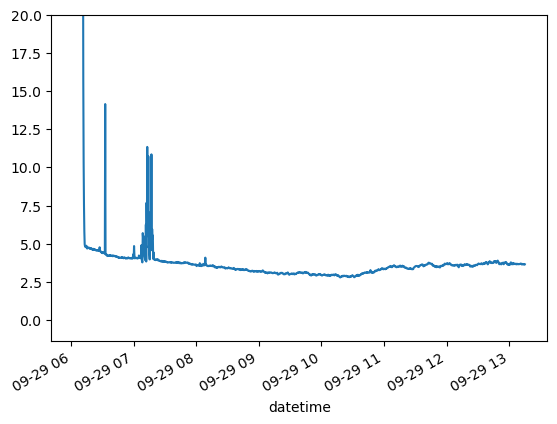

In [119]:
f, a= plt.subplots()
(out*10).plot()
a.set_ylim(top = 20)

## 1625 tuff

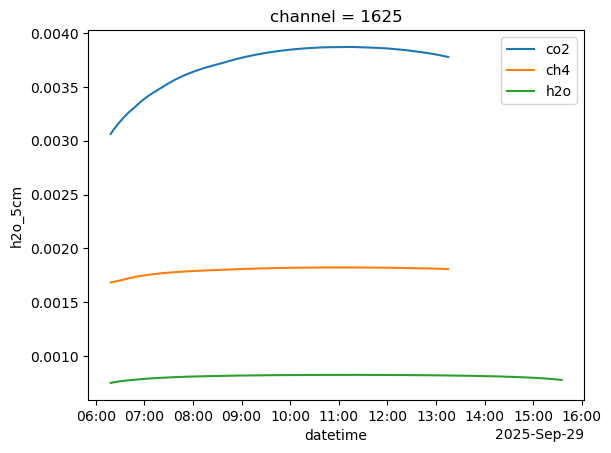

In [9]:
f, a= plt.subplots()
dst = dni648.od_co2_ch4_h2o.sel(channel = 1625)
dst.co2.plot(ax = a, label = 'co2')
dst.ch4.plot(ax = a, label = 'ch4')
dst.h2o_5cm.plot(ax = a, label = 'h2o')
a.legend()

In [10]:
# %matplotlib widget

In [11]:
%matplotlib inline

(-0.01, 0.04)

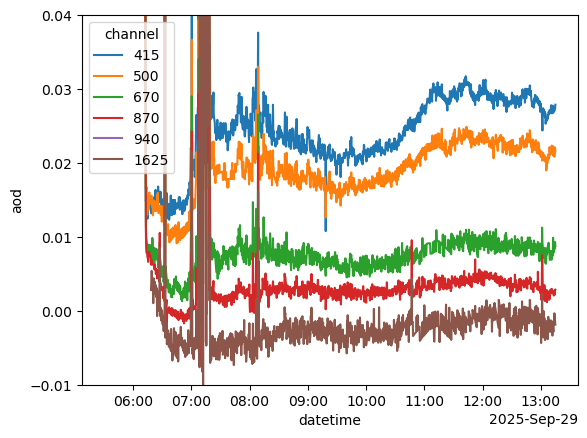

In [12]:
f,a = plt.subplots()
dni648.aod.plot.line(x = 'datetime', ax = a)
a.set_ylim(-0.01, 0.04)

(-0.01, 0.04)

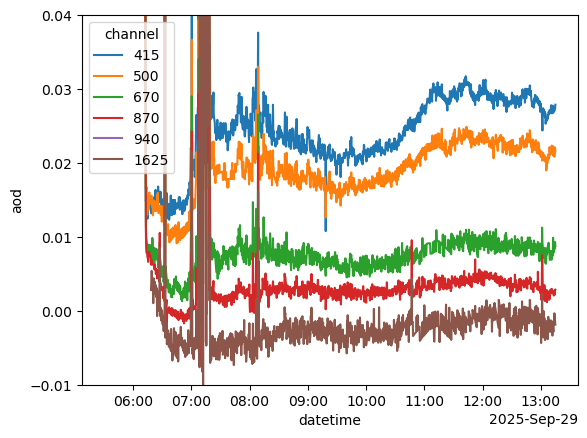

In [226]:
f,a = plt.subplots()
dni648.aod.plot.line(x = 'datetime', ax = a)
a.set_ylim(-0.01, 0.04)

## compare to others

In [208]:
p2fld = pl.Path('/nfs/grad/campaign/frc/2025/AOD/')

In [209]:
list(p2fld.glob('**/*'))

[PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_PTB_CAS'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/US_NOAA_HSR1'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_AEMET_CE'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/FR_LOA.UoL_CE'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_PTB_SSIM'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_UVa_MTS'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_PTB_CAS-IR'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/SE_SMHI_PFR'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_UV_POM'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/JP_JMA_POM'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_CIEMAT_BTS'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_DWD_PFR-F'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/CN_CMA_CW193'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/US_NOAA_MFR#8'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/US_NOAA_MFR#9'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/ES_AEMET_CLT'),
 PosixPath('/nfs/grad/campaign/frc/2025/AOD/DE_

In [227]:
import helpers

In [228]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [229]:
p2f = pl.Path('/nfs/grad/campaign/frc/2025/AOD/JP_JMA_POM/JP_JMA_POM_20250929.aod')
ds = helpers.read_JP_JMA_POM(p2f)
ds_jp_jma_pom = ds
ds

<xarray.Dataset> Size: 41kB
Dimensions:   (datetime: 469, channel: 10)
Coordinates:
  * datetime  (datetime) datetime64[ns] 4kB 2025-09-29T06:20:00 ... 2025-09-2...
  * channel   (channel) int64 80B 340 380 400 500 675 870 1020 1225 1627 2200
Data variables:
    aod       (datetime, channel) float64 38kB 0.0312 0.0333 ... 0.0065 0.0369

(-0.01, 0.05)

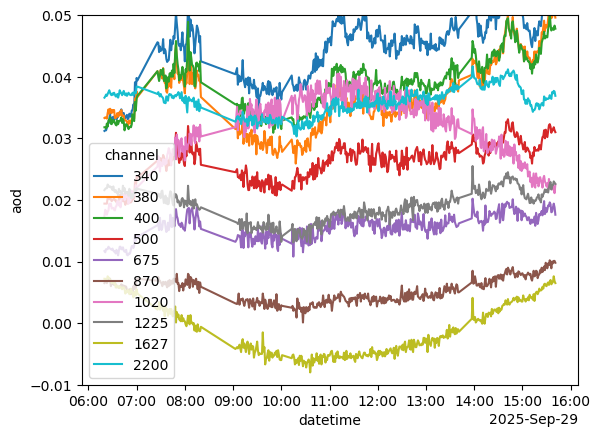

In [230]:
f,a = plt.subplots()
ds_jp_jma_pom.aod.plot.line(x = 'datetime')
a.set_ylim(-0.01,0.05)

In [231]:
p2f = pl.Path('/nfs/grad/campaign/frc/2025/AOD/SE_SMHI_PFR/SE_SMHI_PFR_20250929.aod')
ds = helpers.read_SE_SMHI_PFR(p2f)
ds_se_smhi_pfr = ds

(-0.01, 0.05)

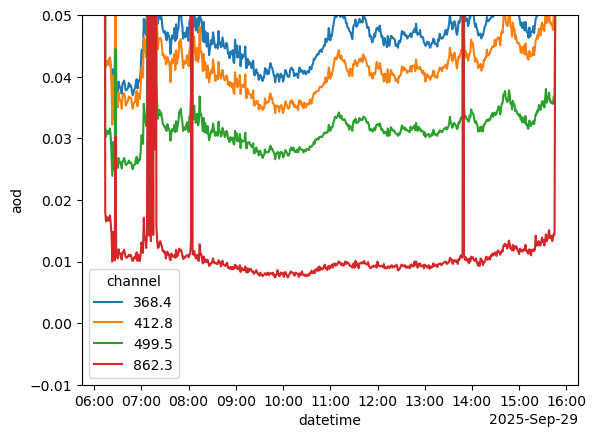

In [232]:
f,a = plt.subplots()
ds.aod.plot.line(x = 'datetime', ax = a)
a.set_ylim(-0.01, 0.05)

In [37]:
ds_jp_jma_pom.channel

<xarray.DataArray 'channel' (channel: 10)> Size: 80B
array([ 340,  380,  400,  500,  675,  870, 1020, 1225, 1627, 2200])
Coordinates:
  * channel  (channel) int64 80B 340 380 400 500 675 870 1020 1225 1627 2200

In [233]:
ds_se_smhi_pfr.channel

<xarray.DataArray 'channel' (channel: 4)> Size: 32B
array([368.4, 412.8, 499.5, 862.3])
Coordinates:
  * channel  (channel) float64 32B 368.4 412.8 499.5 862.3

(-0.01, 0.04)

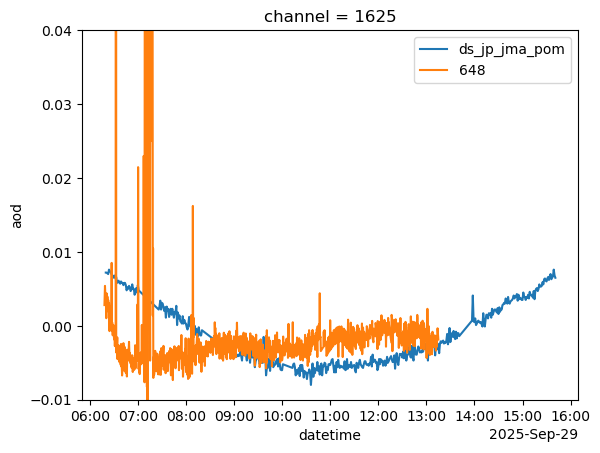

In [234]:
f,a = plt.subplots()
# ds_se_smhi_pfr.aod.sel(channel = 862.3).plot(ax = a, label = p2f.name)
ds_jp_jma_pom.aod.sel(channel = 1627).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 1625).plot(ax = a, label = '648')
# dni649.aod.sel(channel = 1625).plot(ax = a, label = '649')

a.legend()
a.set_ylim(-0.01, 0.04)

(-0.01, 0.04)

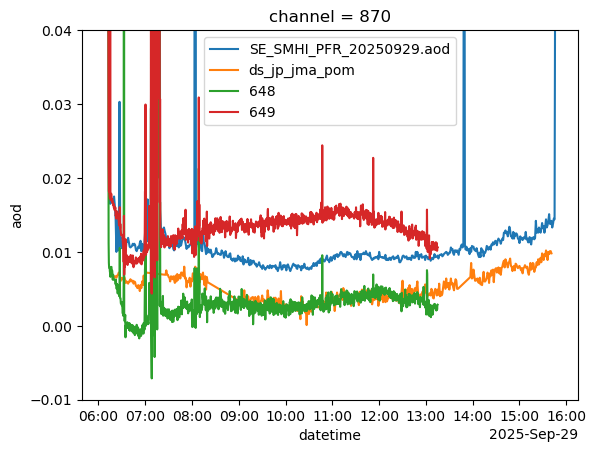

In [39]:
f,a = plt.subplots()
ds_se_smhi_pfr.aod.sel(channel = 862.3).plot(ax = a, label = p2f.name)
ds_jp_jma_pom.aod.sel(channel = 870).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 870).plot(ax = a, label = '648')
dni649.aod.sel(channel = 870).plot(ax = a, label = '649')

a.legend()
a.set_ylim(-0.01, 0.04)

(-0.01, 0.04)

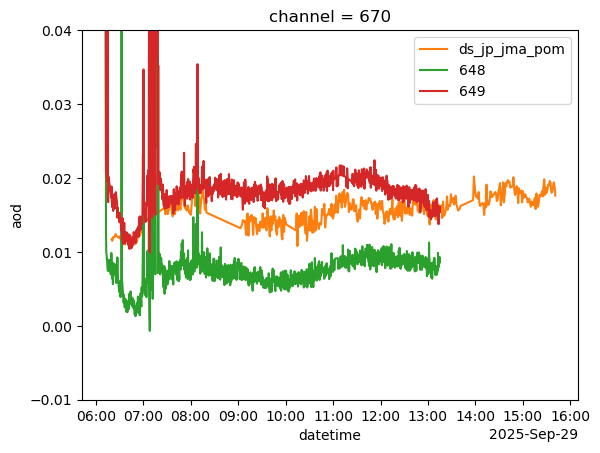

In [42]:
f,a = plt.subplots()
# ds_se_smhi_pfr.aod.sel(channel = 862.3).plot(ax = a, label = p2f.name)
a._get_lines.get_next_color()
ds_jp_jma_pom.aod.sel(channel = 675).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 670).plot(ax = a, label = '648')
dni649.aod.sel(channel = 670).plot(ax = a, label = '649')

a.legend()
a.set_ylim(-0.01, 0.04)

(-0.01, 0.04)

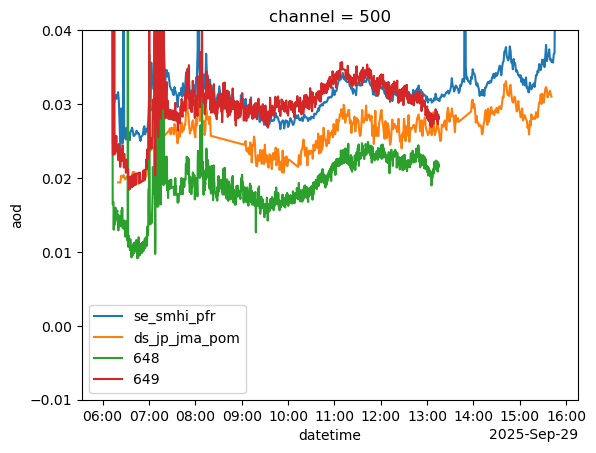

In [40]:
f,a = plt.subplots()
ds_se_smhi_pfr.aod.sel(channel = 499.5).plot(ax = a, label = 'se_smhi_pfr')
ds_jp_jma_pom.aod.sel(channel = 500).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 500).plot(ax = a, label = '648')
dni649.aod.sel(channel = 500).plot(ax = a, label = '649')
a.legend()
a.set_ylim(-0.01, 0.04)

(-0.0, 0.06)

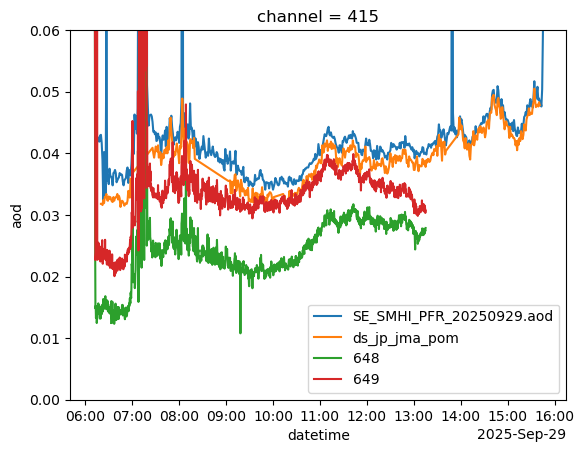

In [41]:
f,a = plt.subplots()#, gridspec_kw={'hspace': 0})
# a = aa[0]
ds_se_smhi_pfr.aod.sel(channel = 412.8).plot(ax = a, label = p2f.name)
ds_jp_jma_pom.aod.sel(channel = 400).plot(ax = a, label = 'ds_jp_jma_pom')
dni648.aod.sel(channel = 415).plot(ax = a, label = '648')
dni649.aod.sel(channel = 415).plot(ax = a, label = '649')

a.legend()
a.set_ylim(-0.0, 0.06)